# Определение перспективного тарифа для телеком компании

    Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


### Описание тарифов

#### Тариф «Смарт»

    1. Ежемесячная плата: 550 рублей
    2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    3. Стоимость услуг сверх тарифного пакета:
         - минута разговора: 3 рубля
         - сообщение: 3 рубля
         - 1 Гб интернет-трафика: 200 рублей
         
#### Тариф «Ультра»

    1.Ежемесячная плата: 1950 рублей
    2.Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    3.Стоимость услуг сверх тарифного пакета:
        - минута разговора: 1 рубль
        - сообщение: 1 рубль
        - 1 Гб интернет-трафика: 150 рублей
        
#### Обратите внимание:
    «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.


### СОДЕРЖАНИЕ

<li>
<a href='#section0'>Шаг 1. Ознакомление с данными и их обработка:</a>
    <ul>
        <a href='#section1'>     0. Импортируем библиотеки</a>
    </ul>
    <ul>
        <a href='#section2'>     1.1. Тарифы</a>
    </ul>
     <ul>
        <a href='#section3'>     1.2. Пользователи</a>
    </ul>
    <ul>
        <a href='#section4'>     1.3 Звонки</a>
    </ul>
    <ul>
        <a href='#section5'>     1.4 Сообщения</a>
    </ul>
    <ul>
        <a href='#section6'>     1.5 Интернет-сессии</a>
    </ul>
</li>

<li>
<a href='#section7'>Шаг 2. Подготовим данные</a>
    <ul>
        <a href='#section8'>     2.1 Восстановим пропуски</a>
    </ul>
    <ul>
        <a href='#section9'>     2.2 Приведем данные к нужным типам</a>
    </ul>
    <ul>
        <a href='#section10'>    2.3 Посчитаем значения, необходимые для анализа каждого пользователя</a>
        <ul>
            <a href='#section11'> 2.3.1 Количество сделанных звонков и израсходованных минут разговора по месяцам</a>
        </ul>
        <ul>
            <a href='#section12'> 2.3.2 Количество отправленных сообщений по месяцам</a>
        </ul>
        <ul>
            <a href='#section13'> 2.3.4 Помесячная выручка с каждого пользователя</a>
        </ul>
    </ul>
</li> 

<li>
 <a href='#section14'>Шаг 3. Анализируем данные</a>
     <ul>
        <a href='#section15'>    3.1 Опишем поведение клиентов оператора, исходя из выборки.</a>
    </ul>
    <ul>
        <a href='#section16'>    3.2 Минуты разговора, количество сообщений и объём интернет-трафика в среднем необходимые пользователям каждого тарифа в месяц</a>
    </ul>
    <ul>
        <a href='#section18'>    3.3 Дисперсия и стандартное отклонение</a>
    </ul>
    <ul>
        <a href='#section20'>    3.4 Москва и другие регионы</a>
    </ul>
</li>

<li>
 <a href='#section21'>Шаг 4. Анализируем данные</a>
    <ul>
        <a href='#section22'>    4.1 Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается</a>
    </ul>
    <ul>
        <a href='#section23'>    4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a>
    </ul>
</li>

<li>
 <a href='#section24'>Шаг 5. Общий вывод</a>
</li>

## Шаг 1. Ознакомление с данными и их обработка:


0. Импортируем библиотеки 
<a id='section1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st

In [2]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

1. Загрузим датасеты

In [3]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

#### 1.1 Тарифы 
<a id='section2'></a>

In [4]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Переименуем колонку с названием тарифа, чтобы в дальнейшем у нас была возможность применить merge по ней.
Также исправим ошибку в названии признака объёма интернет-трафика.

In [5]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff', 'mg_per_month_included': 'mb_per_month_included'})

In [6]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


С типами данных все в порядке. 

#### 1.2 Пользователи
<a id='section3'></a>

In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [9]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [10]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [11]:
users.duplicated().sum()

0

1. 462 пользователя все еще пользуются тарифом:
351 – Смарт
149 – Ультра
2. Пропусков, которые нужно заполнить, и дубликатов в данных нет;
3. Следующие признаки необходимо привести к типу DateTime:
reg_date дата подключения тарифа;
churn_date дата прекращения пользования тарифом.

#### 1.3 Звонки
<a id='section4'></a>

In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Оператор всегда засчитывает разговор меньше минуты как 1 минуту тарифа.

In [13]:
len(calls[calls.duration < 1])

47927

In [14]:
calls.sort_values(['user_id', 'call_date']).head(10)

,id,call_date,duration,user_id
38,1000_38,2018-05-25,0.00,1000
78,1000_78,2018-05-26,10.25,1000
113,1000_113,2018-05-26,6.88,1000
133,1000_133,2018-05-26,4.19,1000
194,1000_194,2018-05-26,13.01,1000
335,1000_335,2018-05-26,1.91,1000
338,1000_338,2018-05-26,10.17,1000
274,1000_274,2018-05-27,3.43,1000
11,1000_11,2018-05-28,18.82,1000
124,1000_124,2018-05-28,0.00,1000


In [15]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [16]:
calls.duplicated().sum()

0

1. call_date приведем к DateTime;
2. 20% звонков имеют продолжительность равную меньше 1 минуты.

Сделаем 2 шага для приведения данных в порядок:
1) применим метод np.ceil для признака, тем самым получив верхнее значение в минутах;
2) заменим нули на 1 – минимальное значение сессии звонка для оператора.

#### 1.4 Сообщения
<a id='section5'></a>

In [17]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [18]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [19]:
messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [20]:
messages.duplicated().sum()

0

message_date дату сообщения хорошо бы привести к DateTime.

#### 1.5 Интернет-сессии
<a id='section6'></a>

In [21]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [22]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Данные полные, без пропусков.

In [23]:
internet.query("user_id == 1001 and session_date == '2018-11-14'")

,Unnamed: 0,id,mb_used,session_date,user_id
227,227,1001_16,0.00,2018-11-14,1001
248,248,1001_37,0.00,2018-11-14,1001
260,260,1001_49,286.53,2018-11-14,1001
302,302,1001_91,0.00,2018-11-14,1001


In [24]:
len(internet.query('mb_used < 1'))

19699

Около 20000 строк с нулевым трафиком. 

In [25]:
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [26]:
internet.duplicated().sum()

0

1. <b>session_date</b> дату интернет-сессии приведем к DateTime.
2. Объём потраченного за сессию интернет-трафика указан в мегабайтах, в то время, как тарификация в гигабайтах. Таким образом, если пользователь израсходует объем трафика, предоставленный тарифным планом, для анализа нам потребуется привести дополнительный объем трафика к гигабайтам, чтобы рассчитать стоимость;
3. 19 699 сессий имеют объём потраченного за сессию интернет-трафика менее 1 Мб. Как и в случае со звонками, наш оператор округляет вверх значения мегабайтов. Поэтому выполним аналогичные 2 шага для приведения данных в порядок:
применим метод <b>np.ceil</b> для признака, тем самым получив верхнее значение в минутах;
заменим нули на 1 – минимальное значение сессии.

## Шаг 2. Подготовим данные
<a id='section7'></a>

### 2.1 Восстановим пропуски
<a id='section8'></a>

Сначала "звонки"

In [27]:
calls['duration'] = calls['duration'].apply(np.ceil)
nonzero_session = calls['duration'] > 0

А затем "интернет-сессии"

In [28]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
nonzero_session = internet['mb_used'] > 0
internet['mb_used'].where(nonzero_session, 1, inplace=True)

### 2.2  Приведем данные к нужным типам
<a id='section9'></a>

In [29]:
dtformat = '%Y-%m-%d'

def to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], format=dtformat)

to_datetime(users, ['reg_date', 'churn_date'])
to_datetime(calls, ['call_date'])
to_datetime(messages, ['message_date'])
to_datetime(internet, ['session_date'])
calls['duration'] = calls['duration'].astype('int64')
internet['mb_used'] = internet['mb_used'].astype('int64')

### 2.3 Посчитаем значения, необходимые для анализа каждого пользователя
<a id='section10'></a>

In [30]:
purchase = pd.DataFrame()

#### 2.3.1 Количество сделанных звонков и израсходованных минут разговора по месяцам
<a id='section11'></a>

In [31]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [32]:
calls_by_month = calls.pivot_table(
    index=['month', 'user_id'],
    values='duration',
    aggfunc=['count', 'sum']
)

In [33]:
tmp_df = pd.DataFrame(calls_by_month.to_records())

In [34]:
purchase['user_id'] = tmp_df['user_id']
purchase['month']   = tmp_df['month']
purchase['calls']   = tmp_df.iloc[:, 2]
purchase['minutes'] = tmp_df.iloc[:, 3]

#### 2.3.2 Количество отправленных сообщений по месяцам
<a id='section12'></a>

In [35]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [36]:
messages_by_month = messages.pivot_table(
    index=['month', 'user_id'],
    values='id',
    aggfunc='count'
)

In [37]:
tmp_df = pd.DataFrame(messages_by_month.to_records()).rename(columns={'id': 'messages'})

In [38]:
purchase = purchase.merge(tmp_df, on=['user_id', 'month'], how='outer')

#### 2.3.3 Объем израсходованного интернет-трафика по месяцам
<a id='section13'></a>

In [39]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [40]:
internet_by_month = internet.pivot_table(
    index=['month', 'user_id'],
    values='mb_used',
    aggfunc='sum'
)

In [41]:
tmp_df = pd.DataFrame(internet_by_month.to_records())

In [42]:
purchase = purchase.merge(tmp_df, on=['user_id', 'month'], how='outer')
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
calls       3174 non-null float64
minutes     3174 non-null float64
messages    2717 non-null float64
mb_used     3203 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


Таким образом, в датафрейме мы видим следующую информацию по пользователям в разрезе месяцев:

1. количество сделанных звонков и израсходованных минут разговора;
2. количество отправленных сообщений;
3. объем израсходованного интернет-трафика в мегабайтах.

После формирования датафрейма по месяцам появились пропуски. Такое ощущение, что некоторые пользователи в некоторые месяцы пользовались не всеми услугами. Например, кто-то только мобильным интернетом. Заполним пропуски нулями и позже посмотрим на распределение.

При соединении датафреймов Pandas привел типы к float64 из-за пропусков,
Поэтому явно приведем их к int64

In [43]:
n_features = ['calls', 'minutes', 'messages']

for f in n_features:
    purchase[f] = purchase[f].fillna(0).astype('int64')

In [44]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
calls       3214 non-null int64
minutes     3214 non-null int64
messages    3214 non-null int64
mb_used     3203 non-null float64
dtypes: float64(1), int64(5)
memory usage: 175.8 KB


In [45]:
purchase.head()

,user_id,month,calls,minutes,messages,mb_used
0,1005,1,15,95,7,2730.0
1,1032,1,61,380,38,24158.0
2,1045,1,1,9,5,2348.0
3,1055,1,64,551,30,17115.0
4,1071,1,24,194,16,15625.0


#### 2.3.4 Помесячная выручка с каждого пользователя
<a id='section14'></a>

Для удобства добавим в датафрейм информацию о пользователях и тарифах

In [46]:
purchase = purchase.merge(users, on='user_id', how='left').merge(tariffs, on='tariff', how='left')

Перерасход минут, сообщений и трафика посчитаем как разность между месячным значением и включенным в тариф

In [47]:
purchase['minutes_over']  = purchase['minutes'] - purchase['minutes_included']
purchase['messages_over'] = purchase['messages'] - purchase['messages_included']
purchase['mb_used_over']  = purchase['mb_used'] - purchase['mb_per_month_included']

In [48]:
purchase.head()

,user_id,month,calls,minutes,messages,mb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,mb_used_over
0,1005,1,15,95,7,2730.0,67,NaT,Набережные Челны,Афанасий,...,50,15360,500,550,200,3,3,-405,-43,-12630.0
1,1032,1,61,380,38,24158.0,31,NaT,Ульяновск,Инна,...,50,15360,500,550,200,3,3,-120,-12,8798.0
2,1045,1,1,9,5,2348.0,48,NaT,Улан-Удэ,Джемма,...,50,15360,500,550,200,3,3,-491,-45,-13012.0
3,1055,1,64,551,30,17115.0,39,NaT,Казань,Луиза,...,50,15360,500,550,200,3,3,51,-20,1755.0
4,1071,1,24,194,16,15625.0,20,2018-08-31,Омск,Гектор,...,50,15360,500,550,200,3,3,-306,-34,265.0


Положительные значения указывают на перерасход. Отрицательные на остаток в рамках тарифа.

In [49]:
internet['gb_used'] = (internet['mb_used'] / 1024 ).round(2)

Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножим на значение из тарифного плана.

In [50]:
def calc_monthly_revenue(row):

    minutes_price = 0
    messages_price = 0
    mb_used_price = 0
    
    # стоимость дополнительных минут
    if row['minutes_over'] > 0:
        minutes_price = row['minutes_over'] * row['rub_per_minute']

    # стоимость дополнительных сообщений
    if row['messages_over'] > 0:
        messages_price = row['messages_over'] * row['rub_per_message']

    # стоимость дополнительного трафика
    if row['mb_used_over'] > 0:
        mb_used_price = np.ceil(row['mb_used_over'] / 1024) * row['rub_per_gb'] 
    
    return minutes_price + messages_price + mb_used_price

In [51]:
purchase['rub_monthly_fee_over'] = purchase.apply(calc_monthly_revenue, axis=1)
purchase['rub_monthly_fee_total'] = purchase['rub_monthly_fee'] + purchase['rub_monthly_fee_over']

Датафрейм только с нужными нами данными

In [52]:
purchase = pd.DataFrame(
   purchase[['month', 'tariff', 'user_id', 'city',
           'calls', 'minutes', 'messages', 'mb_used',
           'minutes_over', 'messages_over', 'mb_used_over',
           'rub_monthly_fee_over', 'rub_monthly_fee_total']]
)

In [53]:
purchase.head()

,month,tariff,user_id,city,calls,minutes,messages,mb_used,minutes_over,messages_over,mb_used_over,rub_monthly_fee_over,rub_monthly_fee_total
0,1,smart,1005,Набережные Челны,15,95,7,2730.0,-405,-43,-12630.0,0.0,550.0
1,1,smart,1032,Ульяновск,61,380,38,24158.0,-120,-12,8798.0,1800.0,2350.0
2,1,smart,1045,Улан-Удэ,1,9,5,2348.0,-491,-45,-13012.0,0.0,550.0
3,1,smart,1055,Казань,64,551,30,17115.0,51,-20,1755.0,553.0,1103.0
4,1,smart,1071,Омск,24,194,16,15625.0,-306,-34,265.0,200.0,750.0


In [54]:
smart_purchase = purchase.query("tariff == 'smart'")

In [55]:
len(smart_purchase.groupby('user_id'))

350

In [56]:
ultra_purchase = purchase.query("tariff == 'ultra'")

In [57]:
len(ultra_purchase.groupby('user_id'))

148

 В нашей результирующей таблицы оказались записи по 350 пользователям тарифа Смарт и 148 тарифа Ультра. Информации о расходах 2х пользователей не нашлось.

## Шаг 3. Анализируем данные
<a id='section15'></a>

#### 3.1 Опишем поведение клиентов оператора, исходя из выборки.
<a id='section16'></a>

In [58]:
values = ['minutes', 'messages', 'mb_used', 'rub_monthly_fee_over', 'rub_monthly_fee_total']

Сделаем сводную таблицу по тарифам в разрезе месяцев

In [59]:
tariff_monthly_purchase = purchase.pivot_table(
    index=['tariff', 'month'],
    values=values
)

In [60]:
smart_monthly_purchase = tariff_monthly_purchase.loc['smart']
smart_monthly_purchase

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
month,,,,,
1,8528.588235,18.235294,203.852941,171.323529,721.323529
2,11617.344828,24.086207,298.689655,277.603448,827.603448
3,15131.207792,31.857143,390.051948,614.623377,1164.623377
4,13486.080357,30.741071,367.133929,413.089286,963.089286
5,15832.751773,33.773050,387.361702,656.021277,1206.021277
6,15822.445122,33.402439,395.640244,660.115854,1210.115854
7,15771.398010,33.751244,408.353234,679.920398,1229.920398
8,16711.324786,33.638298,421.468085,779.957447,1329.957447
9,16332.615385,33.638462,428.611538,706.869231,1256.869231


In [61]:
ultra_monthly_purchase = tariff_monthly_purchase.loc['ultra']
ultra_monthly_purchase

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
month,,,,,
1,13154.666667,33.777778,428.111111,0.000000,1950.000000
2,12860.000000,21.958333,297.125000,25.000000,1975.000000
3,17553.513514,32.297297,489.648649,64.864865,2014.864865
4,16845.254545,31.563636,458.018182,51.818182,2001.818182
5,19676.878788,37.850746,510.328358,111.940299,2061.940299
6,19172.168675,41.726190,479.702381,91.071429,2041.071429
7,20744.533333,49.846154,545.791209,171.428571,2121.428571
8,19780.745283,48.439252,510.775701,133.177570,2083.177570
9,19392.675439,52.286957,539.443478,74.347826,2024.347826


#### 3.2 Минуты разговора, количество сообщений и объём интернет-трафика в среднем необходимые пользователям каждого тарифа в месяц
<a id='section17'></a>

In [62]:
tariff_usage = tariff_monthly_purchase.pivot_table(
    index='tariff',
    values=values
)
tariff_usage

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
tariff,,,,,
smart,15091.033082,31.413211,386.760499,634.320857,1184.320857
ultra,18445.022099,43.714983,495.934310,97.737868,2047.737868


1. Пользователи тарифа Ультра более активны, но пользователи тарифа Смарт тратят в среднем в 6 раз больше на дополнительные пакеты услуг. 
2. Оператору больше денег приносит тариф Ультра, даже с учетом того, что в среднем пользователи не выходят за границы тарифных лимитов, а пользователи тарифа Смарт не тратят столько денег, чтобы перегнать стоимость тарифа Ультра. Таким образом, для пользователя выгоднее тариф Смарт.

#### 3.3  Дисперсия и стандартное отклонение
<a id='section18'></a>

Нормальное распредление определяют среднее и дисперсия. Они позволяют понять насколько шумные сейчас данные.

##### Минуты разговора

In [63]:
smart_purchase['minutes'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: minutes, dtype: float64

In [64]:
ultra_purchase['minutes'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: minutes, dtype: float64

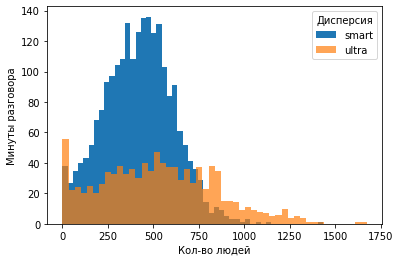

In [65]:
plt.hist(smart_purchase['minutes'], bins=50, label='smart')
plt.hist(ultra_purchase['minutes'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right', title='Дисперсия')
plt.xlabel("Кол-во людей")
plt.ylabel("Минуты разговора")
plt.show()

In [66]:
smart_minutes_var = np.var(smart_purchase['minutes'], ddof=1)
ultra_minutes_var = np.var(ultra_purchase['minutes'], ddof=1)

In [67]:
smart_minutes_var

36219.31578434428

In [68]:
ultra_minutes_var

100873.63339730098

Результаты:

<table>
<thead>
<tr>
    <th>Метрика</th>
    <th>Смарт</th>
    <th>Ультра</th>
</tr>
</thead>
<tbody>
<tr>    
    <td>Стандартное отклонение (мин)</td>
    <td>194.87</td>
    <td>325.73</td>    
</tr>
<tr> 
    <td>Дисперсия	</td>
    <td>37,974.77</td>
    <td>106,105.72</td>    
</tr> 
<tbody>
</table>    

##### Интернет-трафик
<a id='section19'></a>

In [69]:
smart_purchase['mb_used'].describe()

count     2228.000000
mean     16244.472172
std       5871.037024
min          1.000000
25%      12673.250000
50%      16541.500000
75%      20078.750000
max      38627.000000
Name: mb_used, dtype: float64

In [70]:
ultra_purchase['mb_used'].describe()

count      975.000000
mean     19688.587692
std       9952.830482
min          1.000000
25%      12022.000000
50%      19416.000000
75%      26921.500000
max      49793.000000
Name: mb_used, dtype: float64

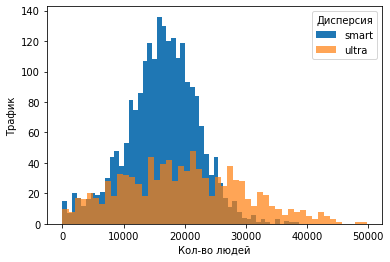

In [71]:
plt.hist(smart_purchase['mb_used'], bins=50, label='smart')
plt.hist(ultra_purchase['mb_used'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right', title='Дисперсия')
plt.xlabel("Кол-во людей")
plt.ylabel("Трафик")
plt.show()

In [72]:
smart_mb_used_var = np.var(smart_purchase['mb_used'], ddof=1)
ultra_mb_used_var = np.var(ultra_purchase['mb_used'], ddof=1)

In [73]:
smart_mb_used_var

34469075.73833619

In [74]:
ultra_mb_used_var

99058834.60600853

Результаты:

<table>
<thead>
<tr>
    <th>Метрика</th>
    <th>Смарт</th>
    <th>Ультра</th>
</tr>
</thead>
<tbody>
<tr>    
    <td>Стандартное отклонение (мин)</td>
    <td>5,871.04</td>
    <td>9,952.83</td>    
</tr>
<tr> 
    <td>Дисперсия	</td>
    <td>34,469,075.73	</td>
    <td>99,058,834.60</td>    
</tr> 
<tbody>
</table>    

### 3.4 Москва и другие регионы
<a id='section20'></a>

In [75]:
moscow = purchase['city'] == 'Москва'
purchase['city'].where(moscow, 'Другой регион', inplace=True)

city_monthly_purchase = purchase.pivot_table(
    index=['city', 'month'],
    values=values
)

In [76]:
city_usage = city_monthly_purchase.pivot_table(
    index='city',
    values=values
)
city_usage

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
city,,,,,
Другой регион,15758.440143,35.268458,413.245425,481.136183,1427.676231
Москва,17603.175813,33.944639,444.005793,420.011205,1514.976475


По средним значениям выручки пользователей Москвы и регионов мы видим, что разница не велика. Пользователи примерно отправляют одинаковое количество смс и звонят примерно одинаковое количество минут. В Москве чуть больше потребляют трафика – ожидаемо с учетом покрытия и скорости.

## Шаг 4. Анализируем данные
<a id='section21'></a>

### 4.1 Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается
<a id='section22'></a>

Проверим гипотизу что средняя сумма денег которую тратят люди на смарт и на ультра равны

Средняя выручка пользователя тарифа "Смарт": 1131.48 руб

Средняя выручка пользователя тарифа "Ультра": 2039.91 руб

#####  H0 (нулевая гипотеза) - предположение о том, что между данными у нас нет связи. В данном случае, что средняя выручка пользователей тарифа не отличается от средней выручки пользователей тарифа .
#####  H1 (альтернативная гипотеза) - средняя выручка пользователей тарифа отличается от средней выручки пользователей тарифа 

Пороговое значение <b>alpha</b> (критический уровень статистической значимости) зададим равным 1%.

In [77]:
alpha = .01

results = st.ttest_ind(
    smart_purchase['rub_monthly_fee_total'], 
    ultra_purchase['rub_monthly_fee_total'],
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.6398772066966188e-245
Отвергаем нулевую гипотезу


Средняя выручка по тарифам не одинакова, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится. Следовательно, средняя выручка пользователей тарифов "Ультра" и "Смарт" действительно различается и наша гипотеза подтвердилась.

### 4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
<a id='section23'></a>

Средняя выручка пользователей из Москвы: 1464.53 руб
Средняя выручка пользователей из других регионов: 1387.79 руб

Нулевая гипотеза H₀: 

- Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

Исходя из H₀ формулируется альтернативная гипотеза H₁:

- Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
______________________________________________________________________________________________________
Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [78]:
alpha = .05

moscow = purchase.query("city == 'Москва'")['rub_monthly_fee_total']
other_cities = purchase.query("city == 'Другой регион'")['rub_monthly_fee_total']

results = st.ttest_ind(moscow, other_cities, equal_var = False)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5117150826987625
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получается.
Таким образом, верно утверждение, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.


## Шаг 5. Общий вывод
<a id='section24'></a>

Люди которые берут смарт стараются выжать из тарифа максимум(что не касается СМС, тк есть месенжеры),
Люди берущие тариф ультра напротив редко используют все ресурсы своего тарифа по СМС и минутам

По этой причине люди, пользующиеся тарифом смарт, часто берут пакеты минут и ГБ сверх тарифа, в отличае от владельцев тарифа
ультра, котрые в редких ситуациях прибегают к этому

Люди, которые пользуются тарифом ультра переплачивают за услуги, тк не используют их полностью

Без разницы откуда из Москвы или из другого города человек, в среднем все платят одинаково

Из двух наших гипотез подтвердилась только первая: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Отвечая на вопрос "какой тариф лучше?":

для оператора – тариф Ультра
для пользователя – тарифа Смарт